In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read the output file #
df = pd.read_csv("outputs/hercules_output.csv", index_col=False)
df.head()

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_powers.002,hercules_comms.amr_wind.wind_farm_0.turbine_powers.003,hercules_comms.amr_wind.wind_farm_0.turbine_powers.004,hercules_comms.amr_wind.wind_farm_0.turbine_powers.005,hercules_comms.amr_wind.wind_farm_0.turbine_powers.006,...,py_sims.inputs.battery_signal,py_sims.inputs.sim_time_s,py_sims.inputs.solar_setpoint_mw,controller.num_turbines,controller.wind_capacity_MW,controller.solar_capacity_MW,external_signals.time,external_signals.plant_power_reference,time,clock_time
0,0.5,10,126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-50000.000000,0.0,50.0,10,50,100,0.5,75000.0,0.5,2024-07-15 17:33:43.226353
1,0.5,10,126.0,1155.250420,1155.190131,1155.184585,1155.250420,1155.190230,1155.184530,1155.250420,...,-35115.163452,0.5,50.0,10,50,100,1.0,75000.0,1.0,2024-07-15 17:33:43.334616
2,0.5,10,126.0,1748.488401,1748.397744,1748.389403,1748.488401,1748.397893,1748.389320,1748.488401,...,-29192.474892,1.0,50.0,10,50,100,1.5,75000.0,1.5,2024-07-15 17:33:43.458917
3,0.5,10,126.0,2041.439844,2041.334054,2041.324322,2041.439844,2041.334228,2041.324225,2041.439844,...,-26255.518240,1.5,50.0,10,50,100,2.0,75000.0,2.0,2024-07-15 17:33:43.595883
4,0.5,10,126.0,2184.248017,2184.134714,2184.124290,2184.248017,2184.134900,2184.124187,2184.248017,...,-24811.427905,2.0,50.0,10,50,100,2.5,75000.0,2.5,2024-07-15 17:33:43.723042


In [3]:
df.columns

print(df['hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000'])
print(df['hercules_comms.amr_wind.wind_farm_0.wind_direction'])
print(df['hercules_comms.amr_wind.wind_farm_0.wind_direction'])
print(df['hercules_comms.amr_wind.wind_farm_0.turbine_powers.000'])

0        0.00000
1      164.88132
2      164.88132
3      164.88132
4      164.88132
         ...    
116    164.88132
117    164.88132
118    164.88132
119    164.88132
120    164.88132
Name: hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000, Length: 121, dtype: float64
0        0.00000
1      164.88132
2      164.88132
3      164.88132
4      164.88132
         ...    
116    164.88132
117    164.88132
118    164.88132
119    164.88132
120    164.88132
Name: hercules_comms.amr_wind.wind_farm_0.wind_direction, Length: 121, dtype: float64
0        0.00000
1      164.88132
2      164.88132
3      164.88132
4      164.88132
         ...    
116    164.88132
117    164.88132
118    164.88132
119    164.88132
120    164.88132
Name: hercules_comms.amr_wind.wind_farm_0.wind_direction, Length: 121, dtype: float64
0         0.000000
1      1155.250420
2      1748.488401
3      2041.439844
4      2184.248017
          ...     
116    4409.198285
117    4409.903941
118    4410.0470

Text(0.5, 0, 'time [hr]')

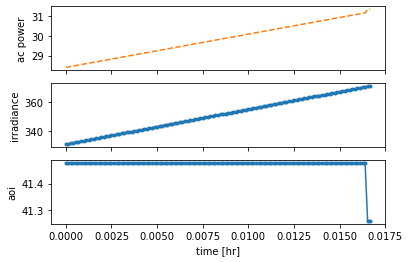

In [4]:
# first test solar module outputs
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]

if "external_signals.solar_power_reference_mw" in df.columns:
    power_setpoint = df["external_signals.solar_power_reference_mw"]
ac_power = df["py_sims.solar_farm_0.outputs.power_mw"]
# dc_power = df["py_sims.solar_farm_0.outputs.dc_power_mw"]
aoi = df["py_sims.solar_farm_0.outputs.aoi"]
irradiance = df["py_sims.solar_farm_0.outputs.dni"]

fig, ax = plt.subplots(3, 1, sharex="col")  # , figsize=[6,5], dpi=250)

if "external_signals.solar_power_reference_mw" in df.columns:
    ax[0].plot(time / 3600, power_setpoint, "-", linewidth=1, label='setpoint', color="C0")
ax[0].plot(time / 3600, ac_power, "--", label="power", color="C1")
ax[0].set_ylabel("ac power")
# ax[0].legend()

# ax[1].plot(time / 3600, dc_power, ".-", label="dc power")
# ax[1].set_ylabel("dc power")

ax[1].plot(time / 3600, irradiance, ".-", label="irradiance")
ax[1].set_ylabel("irradiance")
# ax[1].legend()

ax[2].plot(time / 3600, aoi, ".-", label="aoi")
ax[2].set_ylabel("aoi")
ax[-1].set_xlabel("time [hr]")

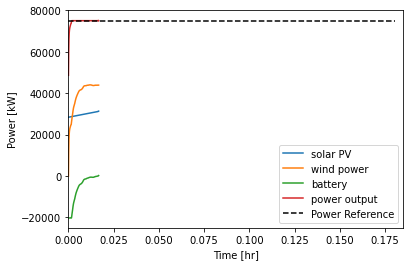

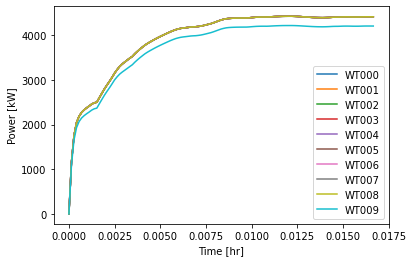

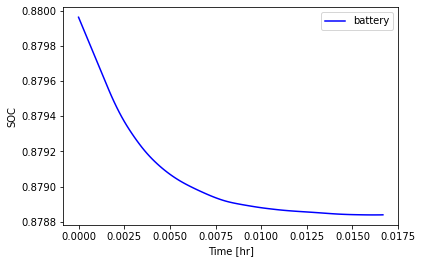

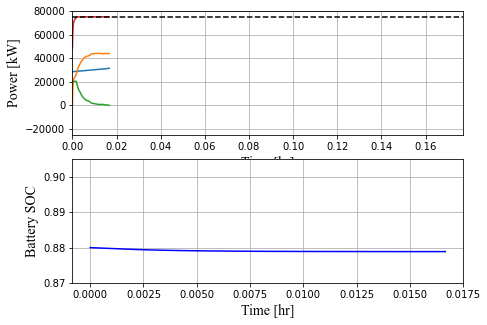

In [5]:
from matplotlib.font_manager import FontProperties

hfont = {'fontname':'Helvetica'}
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

power_ref_input = pd.read_csv("plant_power_reference.csv")



power_output = (df["py_sims.inputs.available_power"]+df["py_sims.solar_farm_0.outputs.power_mw"]*1000) \
    - df["py_sims.battery_0.outputs.power"]
plt.figure()
# plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.000"], label="WT000")
# plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.001"], label="WT001")
plt.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="solar PV")
plt.plot(time / 3600, df["py_sims.inputs.available_power"], label="wind power")
plt.plot(time / 3600, df["py_sims.battery_0.outputs.power"], label="battery")
plt.plot(time / 3600, power_output, label="power output")
plt.plot(power_ref_input['time']/ 3600, power_ref_input['plant_power_reference'],'k--', label="Power Reference")

plt.ylabel("Power [kW]")
plt.xlabel("Time [hr]")
plt.legend()
plt.axis([0, 0.185, -25000, 80000])

plt.figure()

Nturb = 10
for i in range(0,Nturb):
    ending = "00"+str(i)
    turbine_string = "hercules_comms.amr_wind.wind_farm_0.turbine_powers."+ending
    plt.plot(time / 3600, df[turbine_string], label="WT"+ending)

plt.ylabel("Power [kW]")
plt.xlabel("Time [hr]")
plt.legend()

plt.figure()
plt.plot(time / 3600, df["py_sims.battery_0.outputs.soc"], 'b', label="battery")


plt.ylabel("SOC")
plt.xlabel("Time [hr]")
plt.legend()

plt.figure(figsize=(7,5))
top = plt.subplot(2,1,1)

top.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="solar PV")
top.plot(time / 3600, df["py_sims.inputs.available_power"], label="wind power")
top.plot(time / 3600, -df["py_sims.battery_0.outputs.power"], label="battery")
top.plot(time / 3600, power_output, label="power output")
top.plot(power_ref_input['time']/ 3600, power_ref_input['plant_power_reference'],'k--', label="Power Reference")

top.set_ylabel("Power [kW]", font=font, fontsize = 14)
top.set_xlabel("Time [hr]", font=font, fontsize = 14)
# top.legend( fontsize = 11, loc='best')
top.axis([0, 0.177, -25000, 80000])
top.grid()

# box = top.get_position()
# top.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# top.legend(loc='center left', bbox_to_anchor=(1, 0.5))

bot = plt.subplot(2,1,2)
bot.plot(time / 3600, df["py_sims.battery_0.outputs.soc"], 'b')

bot.set_ylabel("Battery SOC", font=font, fontsize = 14)
bot.set_xlabel("Time [hr]", font=font, fontsize = 14)
bot.set_ylim([0.87,0.905])
bot.grid()



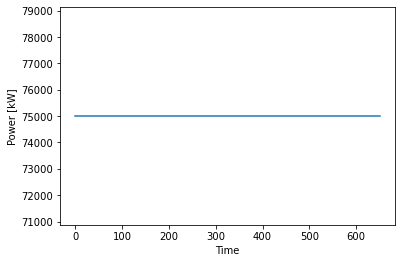

In [25]:
# Create output file for wind data

power_value = 75000 # in kW
# power_value = 20000 # in kW
plant_power_reference = power_value*np.ones(203)
time = np.linspace(101.0, 650.0, num=200)
time = np.insert(time, 0, 100.0)
time = np.insert(time, 0,  10.0)
time = np.insert(time, 0, 0.0)
# time[0] = 0.0
# time[1] = 10.0
# time[2] = 100.0

# for i in range(3,len(Power_reference)):
#     Power_reference[i] = Power_reference[i] + (np.random.rand()-0.5) * power_value * 0.02

plt.figure()
plt.plot(time, plant_power_reference)
plt.ylabel("Power [kW]")
plt.xlabel("Time")
zipped = np.transpose([time, plant_power_reference])

# np.savetxt("plant_power_reference.csv", zipped, fmt='%1.4e', delimiter=',', header="time,plant_power_reference", comments="")
# np.savetxt("plant_power_reference.csv", zipped, fmt='%1.4e', delimiter=',', header="time,wind_power_reference", comments="")


